# Employee Attrition Classification
---


**Background**  
Attrition is gradual workforce reduction through employee retirements, resignations, deaths or elimination of positions without immediately filling vacancies. attrition generally involves voluntary departures rather than dismissals or layoffs. It's viewed as a normal and anticipated process in organizations as employees transition into new phases of their lives or careers. [(*source*)](https://www.shrm.org/topics-tools/news/employee-relations/attrition-definition-types-causes-mitigation-tips)

Employee Attrition Classification provides a comprehensive and realistic view of the factors affecting employee retention, making it a valuable resource for researchers and practitioners in the field of human resources and organizational development. 



**Problem Statement**   
Create a machine learning model that accurately detects employee attrition based on detailed employee profile features, including demographics, job-related characteristics, and personal circumstances in a month. Success will be measured by accuracy, precision, and recall, with a target of achieving at least an 75% accuracy rate in predicting at-risk employees. The project will utilize a dataset of employee profiles containing relevant features for model training, ensuring access to quality data for effective modeling.

**Problem Statement Exploration**
- How Many Employee that Left?
- What is the percentage of employees who have left the company compared to those who have stayed ?
- What is the rate of employee attrition across different job levels ?
- Is Work-Life Balance significantly different between Entry, Mid, and Senior levels? 
- What is the percentage distribution of employees across all job roles?
- What is the average income for each job role?

**Objectives**
- Able to fully understand the notion of machine learning.
- Skilled in preparing data for use in models of classification supervised learning.
- Expert in using selected datasets to conduct Classification Supervised Learning.
- Capable of optimizing models and doing hyperparameter tuning.

Deploy : [Huggingface](https://huggingface.co/spaces/mseptianz/Employee_Attrition)


**Dataset**
- Title : train.csv
- Source: [Click Here!](https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset?select=train.csv)

**Employee Attrition Dataset**

| **Feature**               | **Description**                                                                 | **Type**      | **Categories/Range**                                          |
|---------------------------|---------------------------------------------------------------------------------|---------------|---------------------------------------------------------------|
| **Employee ID**            | Unique identifier assigned to each employee.                                    | Numeric       | Unique                                                        |
| **Age**                    | Age of the employee.                                                            | Numeric       | 18 - 60 years                                                 |
| **Gender**                 | Gender of the employee.                                                         | Categorical   | Male, Female                                                  |
| **Years at Company**       | Number of years the employee has worked at the company.                         | Numeric       | Varies                                                        |
| **Monthly Income**         | Monthly salary of the employee, in dollars.                                     | Numeric       | Varies                                                        |
| **Job Role**               | Department or role the employee works in.                                       | Categorical   | Finance, Healthcare, Technology, Education, Media              |
| **Work-Life Balance**      | Employee's perceived balance between work and personal life.                    | Categorical   | Poor, Below Average, Good, Excellent                           |
| **Job Satisfaction**       | Employee's satisfaction with their job.                                         | Categorical   | Very Low, Low, Medium, High                                    |
| **Performance Rating**     | Employee's performance rating.                                                  | Categorical   | Low, Below Average, Average, High                              |
| **Number of Promotions**   | Total number of promotions the employee has received.                           | Numeric       | Varies                                                        |
| **Distance from Home**     | Distance between the employee's home and workplace (in miles).                  | Numeric       | Varies                                                        |
| **Education Level**        | Highest education level attained by the employee.                               | Categorical   | High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD |
| **Marital Status**         | Marital status of the employee.                                                 | Categorical   | Divorced, Married, Single                                      |
| **Number of Dependents**              | Number of Dependents                                                        | Numerical   | 1 - 6                                             |
| **Job Level**              | Employee's job level.                                                           | Categorical   | Entry, Mid, Senior                                             |
| **Company Size**           | Size of the company where the employee works.                                   | Categorical   | Small, Medium, Large                                           |
| **Company Tenure**         | Total number of years the employee has worked in the industry.                  | Numeric       | Varies                                                        |
| **Remote Work**            | Whether the employee works remotely.                                            | Categorical   | Yes, No                                                       |
| **Leadership Opportunities**| Whether the employee has leadership opportunities.                             | Categorical   | Yes, No                                                       |
| **Innovation Opportunities**| Whether the employee has opportunities for innovation.                         | Categorical   | Yes, No                                                       |
| **Company Reputation**     | Employee's perception of the company's reputation.                              | Categorical   | Very Poor, Poor, Good, Excellent                               |
| **Employee Recognition**   | Level of recognition the employee receives.                                     | Categorical   | Very Low, Low, Medium, High                                    |
| **Attrition**              | Whether the employee has left the company.                                      | Binary        | 0 (Stayed), 1 (Left)                                           |




## 2. Import Libraries

Import several libraries or modules that needed into the notebook

In [1]:
# Library for dataframe and manipulation
import numpy as np
import pandas as pd

# Library for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
# Libaries related to feature engineering
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder,OrdinalEncoder
from feature_engine.outliers import Winsorizer
from scipy.stats import chi2_contingency, kendalltau
from scipy import stats
from sklearn.pipeline import Pipeline,make_pipeline


# Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb



# Model Evaluation and Parameter Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  RandomizedSearchCV,  StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay
from scipy.stats import randint
from scipy.stats import skew

# model saving
import pickle

# Library for warnings
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Setting Random seed, so any code output will still remain in other running time
np.random.seed(9090)

## 3. Data Loading

In [2]:
# Load data csv
df = pd.read_csv('Dataset/train.csv')

In [3]:
# Show the first 10 data
print('The first 10 rows data')
display(df.head(10))

# Show the last 10 data
print('The last 10 rows data')
display(df.tail(10))

The first 10 rows data


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
5,24368,38,Female,3,Technology,9977,Fair,High,Below Average,3,...,0,Mid,Medium,47,No,No,Yes,Fair,High,Left
6,64970,47,Male,23,Education,3681,Fair,High,High,1,...,3,Entry,Small,93,No,No,No,Good,Medium,Left
7,36999,48,Male,16,Finance,11223,Excellent,Very High,High,2,...,4,Entry,Medium,88,No,No,No,Excellent,Low,Stayed
8,32714,57,Male,44,Education,3773,Good,Medium,High,1,...,4,Entry,Medium,75,No,No,No,Fair,Medium,Stayed
9,15944,24,Female,1,Healthcare,7319,Poor,High,Average,1,...,4,Entry,Large,45,No,No,Yes,Good,Low,Left


The last 10 rows data


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
59588,67222,49,Male,28,Technology,6533,Fair,Medium,High,1,...,4,Entry,Medium,93,No,No,No,Good,Medium,Left
59589,41091,18,Male,5,Healthcare,9563,Good,Low,Average,0,...,4,Entry,Large,23,No,No,No,Poor,Medium,Left
59590,16024,23,Male,10,Healthcare,8143,Fair,High,Average,0,...,1,Mid,Small,73,No,No,No,Fair,Medium,Left
59591,60264,42,Male,10,Technology,10727,Good,High,Average,0,...,1,Mid,Small,73,No,No,No,Fair,High,Left
59592,44132,38,Male,23,Finance,10351,Excellent,Medium,Below Average,2,...,4,Entry,Small,54,No,No,No,Poor,Medium,Stayed
59593,37195,50,Female,12,Education,4414,Fair,High,Average,1,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left
59594,6266,18,Male,4,Healthcare,8040,Fair,High,High,3,...,0,Senior,Medium,73,No,No,No,Fair,Medium,Left
59595,54887,22,Female,14,Technology,7944,Fair,High,High,0,...,2,Entry,Small,29,No,Yes,No,Good,Medium,Stayed
59596,861,23,Male,8,Education,2931,Fair,Very High,Average,0,...,0,Entry,Large,9,No,No,No,Good,Low,Left
59597,15796,56,Male,19,Technology,6660,Good,High,Average,0,...,3,Mid,Medium,81,No,No,No,Good,Low,Stayed


The data successfully loaded into the notebook, next check the dataset info to understand the data

In [4]:
# Check Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

- Dataset has 59598 rows with 24 columns
- Consists of 15 columns of Categorical, 8 columns of Numeriocal and 5 columns of binary
- No missng value found in the data, we don't need to handle it later anymore,because it's already clean

#### Split Categorikal and Numerical columns

In [5]:
# Categorical features
cat_cols = [
    'Gender',  'Job Role', 'Work-Life Balance', 'Job Satisfaction',  'Performance Rating', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']

# Numerical Features
num_cols = [ 'Employee ID', 'Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Company Tenure', 'Number of Dependents']

# Binary Features
bin_cols = ['Overtime', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Attrition']


## 4. Exploratory Data Analysis (EDA)

Before we continue we will copy the original dataset in order to keep the real data in case there is something unwanted during the data manipulation process

In [6]:
df_eda = df.copy()

### How Many Employees that Left?

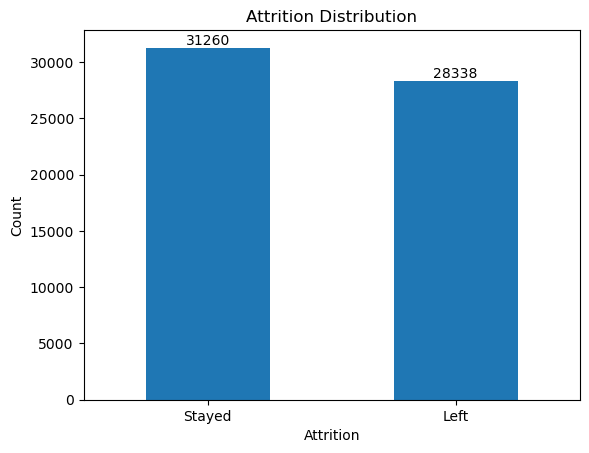

In [7]:
# Check the churn
df_eda['Attrition'].value_counts().plot(kind='bar', rot=0)

# Adding annotations to the bars in Subplot 3
for p in plt.gca().patches:
    plt.gca().annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
    xytext=(0, 5), textcoords='offset points')

# Set labels and title
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Attrition Distribution')

# Show the plot
plt.show()

The data shows 
- There are 28338 employees that left
- There are 31260 employees that stayed
- Although the number of employees who stayed is still greater than the number of employees who left, the number of employees who left cannot be considered small because it almost reaches 50% of the total.

### Percentage of Employees Who Left vs. Stayed

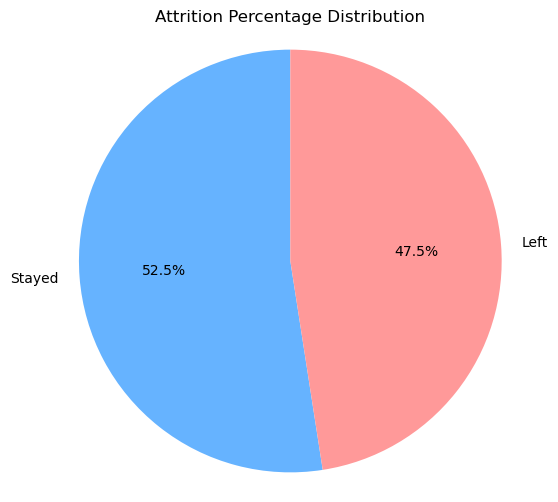

In [8]:
# Check the churn percentages
churn_counts = df_eda['Attrition'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])

# Set title
plt.title('Attrition Percentage Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()


**From the graph above, it is known:** 
- Relatively High Attrition Rate, Despite the balance, the percentage of employees leaving (47.2%) is quite high. A high attrition rate can negatively impact productivity, employee morale, and recruitment costs.
- The relatively high percentage of employees leaving could indicate issues related to job satisfaction. Factors such as excessive workload, lack of career development opportunities, or dissatisfaction with salary can drive employees to seek other jobs.
> To reduce employee attrition, it is important to conduct recruitment with strict selection and thorough interviews. Improving employee engagement through satisfaction surveys and participation programs is also very valuable. Offer training and clear career paths to support professional development.

### Attrition By Job Level

In [9]:

# Grouping by Job Level and Attrition to count the occurrences
job_level_attrition = df_eda.groupby(['Job Level', 'Attrition']).size().unstack()
job_level_attrition


Attrition,Left,Stayed
Job Level,,
Entry,15082,8785
Mid,10823,12930
Senior,2433,9545


In [10]:

# Creating a plot
fig = go.Figure()

# Adding bar for 'Left'
fig.add_trace(go.Bar(
    x=job_level_attrition.index,
    y=job_level_attrition['Stayed'],
    name='Stayed',
    marker_color='lightsalmon'
))

# Adding bar for 'Stayed'
fig.add_trace(go.Bar(
    x=job_level_attrition.index,
    y=job_level_attrition['Left'],
    name='Left',
    marker_color='lightseagreen'
))

# Adding layout
fig.update_layout(
    title='Attrition by Job Level',
    xaxis_title='Job Level',
    yaxis_title='Count',
    barmode='group'
)

# Displaying the plot
fig.show()


**From the graph above, it is known:** 

- **Highest Attrition Rate at Entry Level**, The graph shows that the highest employee left rate is at the entry level. This indicates that many new employees decide to leave the company within a relatively short period.
- **Attrition Rate Decreases with Higher Job Levels**, The higher the job level, the lower the employee turnover rate.

>Suggestion : The high attrition rate at the entry level indicates that the onboarding process may need to be improved. An effective onboarding program can help new employees feel more integrated with the company and reduce their desire to leave.


### Is Work-Life Balance significantly different between Entry, Mid, and Senior levels?

In [11]:
wlb_by_job_level =df.groupby(['Job Level' ,'Work-Life Balance']).size().unstack()
wlb_by_job_level

Work-Life Balance,Excellent,Fair,Good,Poor
Job Level,,,,
Entry,4255,7283,9030,3299
Mid,4290,7166,8986,3311
Senior,2174,3597,4512,1695


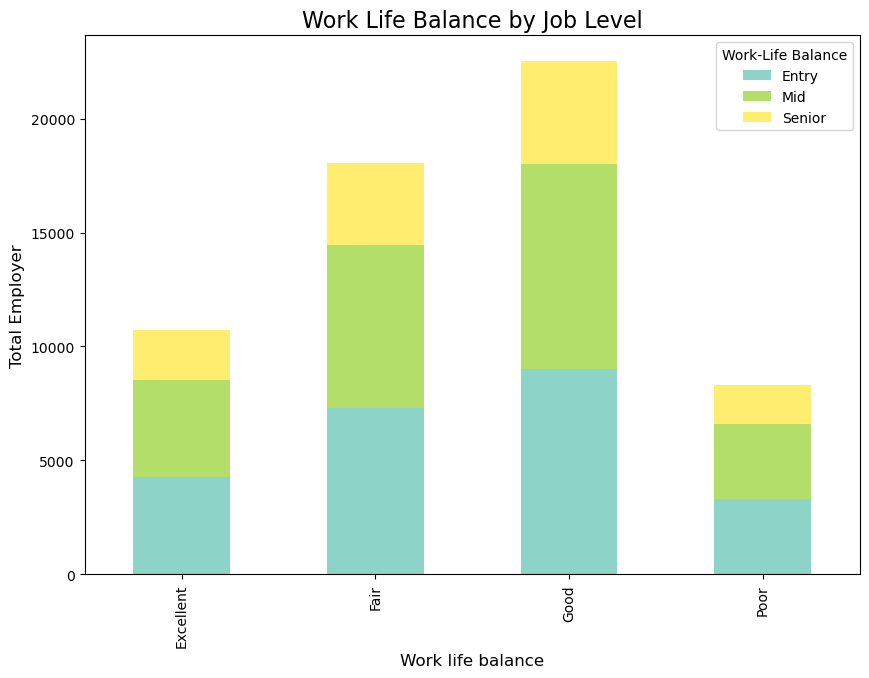

In [12]:
# Using pivot table to make a new dataframe
wlb_by_job_level = df.groupby(['Work-Life Balance', 'Job Level']).size().unstack()

# Create stacked bar chart
wlb_by_job_level.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='Set3')

# Set title and label
plt.title('Work Life Balance by Job Level', fontsize=16)
plt.xlabel('Work life balance', fontsize=12)
plt.ylabel('Total Employer', fontsize=12)

# Menampilkan visualisasi
plt.legend(title='Work-Life Balance')
plt.show()


The graph provides an interesting overview of the distribution of work-life balance across various levels of positions   
According to the graphic,we knows that 
- Most entry-level employees have a work-life balance that is categorized as "good" and "Fair." This indicates that at the beginning of their careers, many employees can still balance work demands with personal life.
- Mid-level employees show a more even distribution across all categories. It means that at this level, work-life balance becomes more varied, with some being very good, Fair, and even some being poor. This indicates that work pressure is starting to increase at this level.
- Senior employees tend to have a better work-life balance. Most of them fall into the "Excelleent" and "good" categories. This could be due to their experience and better time management skills, or perhaps because the company has provided more support to maintain their work-life balance.

### Job Role Analysis

In [13]:
df_eda['Job Role'].value_counts()

Job Role
Technology    15507
Healthcare    13642
Education     12490
Media          9574
Finance        8385
Name: count, dtype: int64

In [14]:
# Average monthly income by job role (assuming a DataFrame named 'df' exists)
avg_income_by_job_role = df.groupby('Job Role')['Monthly Income'].mean().sort_values(ascending=False).reset_index()
avg_income_by_job_role


,Job Role,Monthly Income
0,Technology,9108.653511
1,Finance,8497.713775
2,Healthcare,8001.337267
3,Media,5991.803426
4,Education,4498.584948


#### Visualization

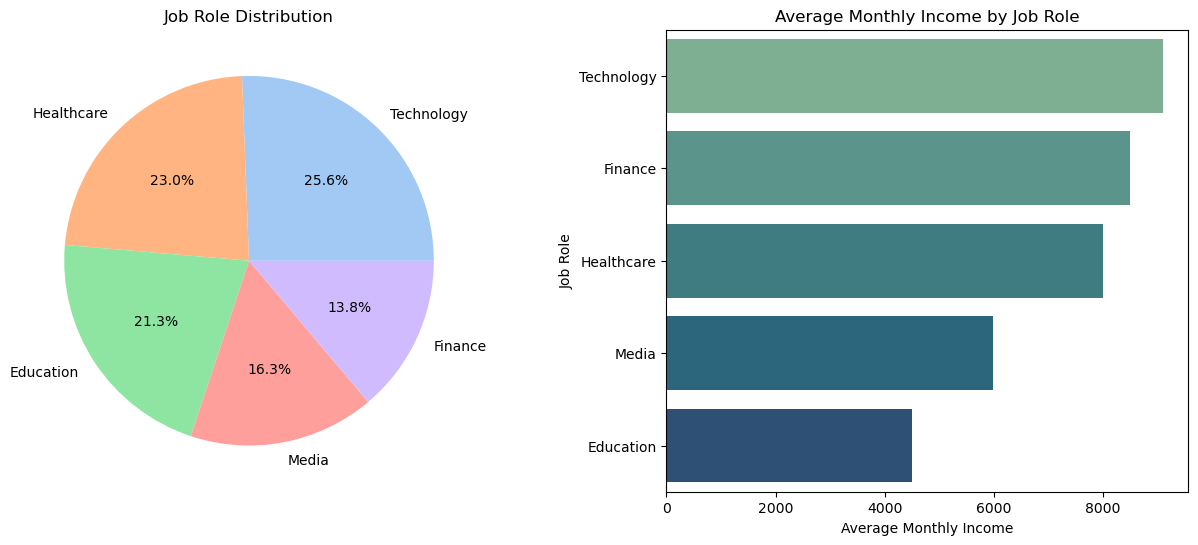

In [15]:

# Data of the number of employees per job role
data_job_role = {'Technology': 3815, 'Healthcare': 3432, 'Education': 3168, 'Media': 2422, 'Finance': 2063}

# Create a figure with two subplots
plt.figure(figsize=(16, 6))

# First subplot: Pie chart for job role distribution
colors = sns.color_palette('pastel', len(data_job_role))
plt.subplot(1, 2, 1)
plt.pie(data_job_role.values(), labels=data_job_role.keys(), autopct='%1.1f%%',colors=colors)
plt.title('Job Role Distribution')

# Second subplot: Bar chart for average monthly income by job role
plt.subplot(1, 2, 2)
sns.barplot(x='Monthly Income', y='Job Role', data=avg_income_by_job_role, palette='crest')
plt.title('Average Monthly Income by Job Role')
plt.xlabel('Average Monthly Income')
plt.ylabel('Job Role')

# Adjust spacing between subplots
plt.subplots_adjust(left=0.1, right=0.85, wspace=0.3)

# Show the plot
plt.show()

The graph provides an interesting overview of the distribution of job roles distribution and their corresponding average monthly incomes.

According to the graph, it is known :   
- Technology has the highest average monthly income.
- Education has the lowest average income.
- This information can be an important consideration for individuals who are contemplating career choices. If financial factors are a priority, then the technology, healthcare, and finance sectors could be attractive options.

## 5. Feature Engineering

Create duplicate data before we continue proceed the data, it will be preprocessed and processed later into the building model process . This will assist in preventing any unintended from affecting the original data collection.

In [16]:
data_fe = df.copy()
data_fe

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,37195,50,Female,12,Education,4414,Fair,High,Average,1,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left
59594,6266,18,Male,4,Healthcare,8040,Fair,High,High,3,...,0,Senior,Medium,73,No,No,No,Fair,Medium,Left
59595,54887,22,Female,14,Technology,7944,Fair,High,High,0,...,2,Entry,Small,29,No,Yes,No,Good,Medium,Stayed
59596,861,23,Male,8,Education,2931,Fair,Very High,Average,0,...,0,Entry,Large,9,No,No,No,Good,Low,Left


---
### Duplicate Data Check

In [17]:
# Checking duplicates data
data_fe.duplicated().sum()

0

Duplicate data is not found

---
### Cardinality Check

In [18]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in cat_cols:
  listItem.append([col, data_fe[col].nunique(), data_fe[col].unique()])
for col in num_cols:
  listItem.append([col, data_fe[col].nunique(), data_fe[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,Gender,2,"[Male, Female]"
1,Job Role,5,"[Education, Media, Healthcare, Technology, Finance]"
2,Work-Life Balance,4,"[Excellent, Poor, Good, Fair]"
3,Job Satisfaction,4,"[Medium, High, Very High, Low]"
4,Performance Rating,4,"[Average, Low, High, Below Average]"
5,Education Level,5,"[Associate Degree, Master’s Degree, Bachelor’s Degree, High School, PhD]"
6,Marital Status,3,"[Married, Divorced, Single]"
7,Job Level,3,"[Mid, Senior, Entry]"
8,Company Size,3,"[Medium, Small, Large]"
9,Remote Work,2,"[No, Yes]"


`Employee ID` does not provide relevant contributions for future analysis because each value in this column is unique, so there is no information that can be used to identify specific patterns among employees.


In [19]:
data_fe.drop(['Employee ID'], axis=1, inplace=True)

---
### Data Splitting

In [20]:
# Create separated data for data inference
data_inf = df.sample(1, random_state=99)

# Delete the inference data in the main data
df.drop(data_inf.index, inplace=True)

# Reset the index of the main data and inference data
df.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# Delete the target from the inference data
data_inf.drop(['Attrition'], axis=1, inplace=True)

#### Spliting X & Y

In [21]:
X = data_fe.drop(['Attrition'], axis=1)
y = data_fe['Attrition']

#### Splitting Train & Test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2,
                                                    random_state = 12)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (47678, 22)
Test Size (11920, 22)


The splitting process is done, now we have a train data and test data

---
### Missing Value

In [23]:
X_train.isnull().sum()

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
dtype: int64

In [24]:
X_test.isnull().sum()

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
dtype: int64

From the result above show us, train data and test data has no missing value,it's mean the data is already clean 

---
### Handling Outliers

#### Checking Data Distribution

In [25]:
#checking distribution from skewness
num_cols_fe = ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Company Tenure', 'Number of Dependents']
listItem= []

for col in num_cols_fe:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])

skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness


,nama kolom,nilai skewness,distribution
0,Age,-0.0,normal
1,Years at Company,0.8,skewed
2,Monthly Income,0.1,normal
3,Number of Promotions,1.0,skewed
4,Distance from Home,0.0,normal
5,Company Tenure,0.1,normal
6,Number of Dependents,0.7,skewed


From the result above, it is known numerical fiture in dataset has :
- 4 normally distributed data 
- 3 skewed distributed data 

#### Visualization data distribution

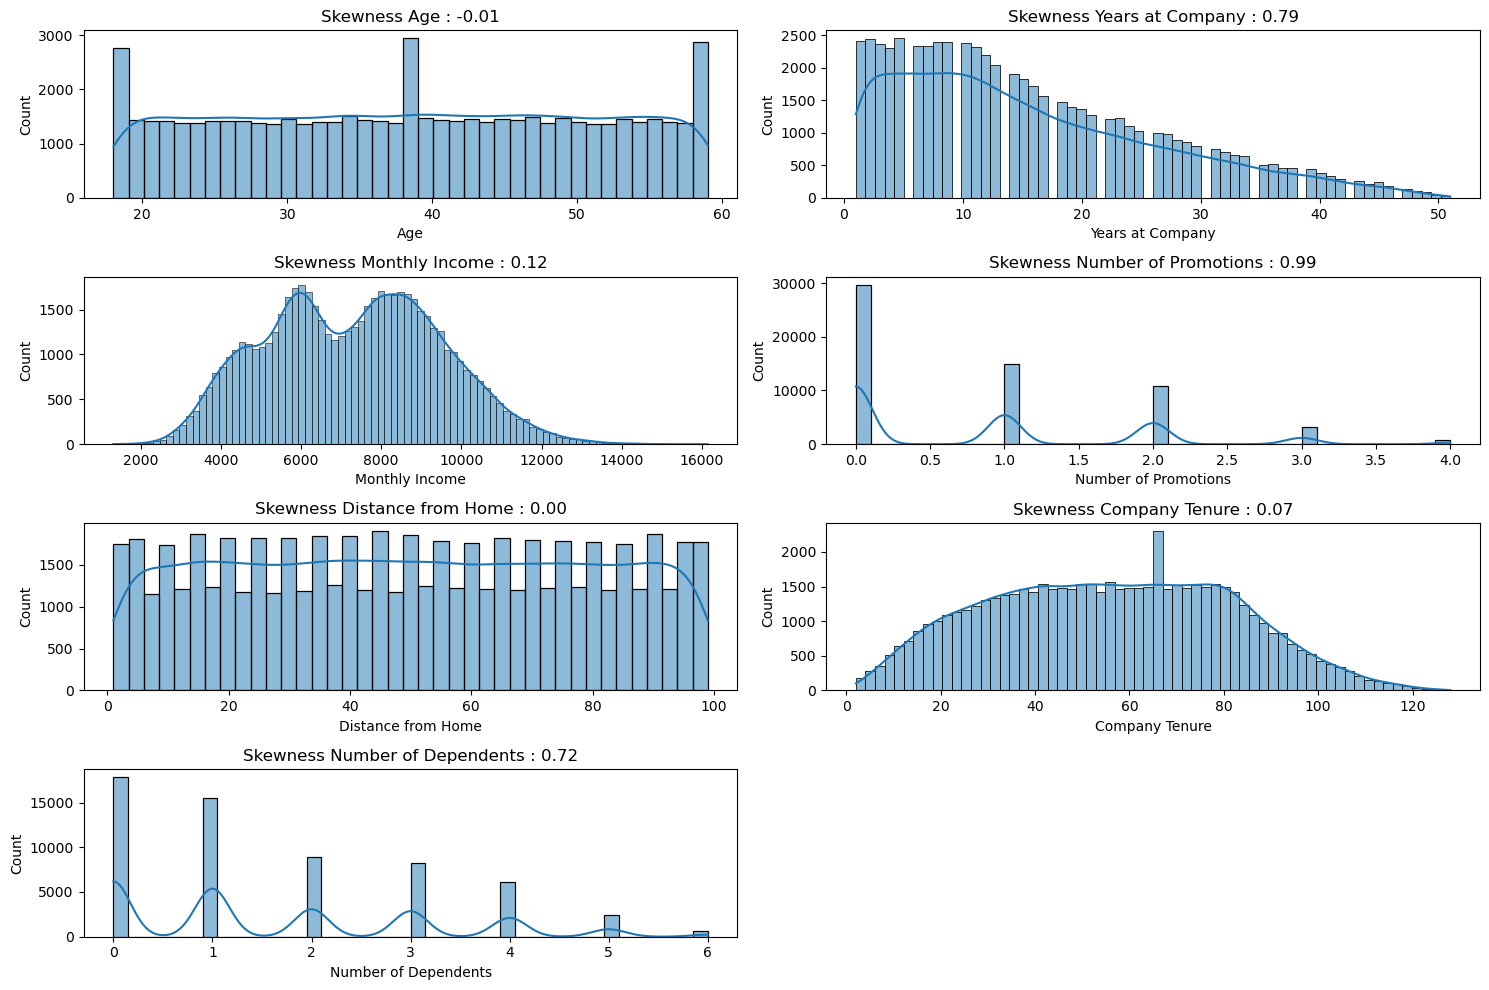

In [26]:
# create subplot grid 
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Flattening the array axes into a list

# Looping for checking skewness to make a histogramm
for i, col in enumerate(num_cols_fe):
     if not data_fe[col].dropna().empty: 
        skewness_value = skew(data_fe[col].dropna())  # ignoring missing values
        sns.histplot(data_fe[col].dropna(), kde=True, ax=axes[i])
        axes[i].set_title(f'Skewness {col} : {skewness_value:.2f}')
     else:
        axes[i].set_visible(False)  # Hiding subplot where no data available

# Deleting unused subplot
for x in range(i+1, len(axes)):
    axes[x].set_visible(False)

plt.tight_layout()
plt.show()


#### Checking Outliers

In [27]:
def calculate_outliers(X_train, skewness):
    # Creting list
    column = []
    lower_bound = []
    upper_bound = []
    percent_total_outlier = []

    # Loop for counting outliers
    for row in range(len(skewness)):
        col = skewness['nama kolom'][row]

        # Cheking Upper boundries and lower boundries
        if skewness['distribution'][row] == 'skewed':
            IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
            lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
            upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
        else:
            lower_boundary = X_train[col].mean() - 3 * X_train[col].std()
            upper_boundary = X_train[col].mean() + 3 * X_train[col].std()

        # add to list
        column.append(col)
        lower_bound.append(lower_boundary)
        upper_bound.append(upper_boundary)
        
        # Counting percentage of total outliers
        totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) +
                   (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
        percent_total_outlier.append(totout)

    # convert result to dataframe
    outliers = pd.DataFrame({
        'column': column,
        'upper_boundary': [round(ub, 2) for ub in upper_bound],
        'lower_boundary': [round(lb, 2) for lb in lower_bound],
        'percentage_total_outlier': [round(percent, 2) for percent in percent_total_outlier]
    })

    return outliers

outliers = calculate_outliers(X_train, skewness)
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,Age,74.82,2.39,0.00
1,Years at Company,71.00,-41.00,0.00
2,Monthly Income,13763.27,839.91,0.07
3,Number of Promotions,8.00,-6.00,0.00
4,Distance from Home,135.49,-35.52,0.00
5,Company Tenure,131.99,-20.35,0.00
6,Number of Dependents,12.00,-9.00,0.00


   
The percentage of outliers is only found in the monthly income feature at 0.07%, indicating that the number of outliers is very small compared to the total data. Since monthly income is a sensitive feature, it is advisable not to remove the data. In this case, we will try capping the outliers to the upper and lower bounds.

In [28]:
winsoriser = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=['Monthly Income'],
                            missing_values='ignore')
    
X_train_capped = winsoriser.fit_transform(X_train)
X_test_capped = winsoriser.transform(X_test)


In [29]:
outliers_after_capping = calculate_outliers(X_train_capped, skewness)
outliers_after_capping

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,Age,74.82,2.39,0.0
1,Years at Company,71.00,-41.00,0.0
2,Monthly Income,13759.85,842.67,0.0
3,Number of Promotions,8.00,-6.00,0.0
4,Distance from Home,135.49,-35.52,0.0
5,Company Tenure,131.99,-20.35,0.0
6,Number of Dependents,12.00,-9.00,0.0


No outliers found after capping,let's visualize the different before and after capping

#### Visualization before and after capping

In [30]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Age - Before Capping


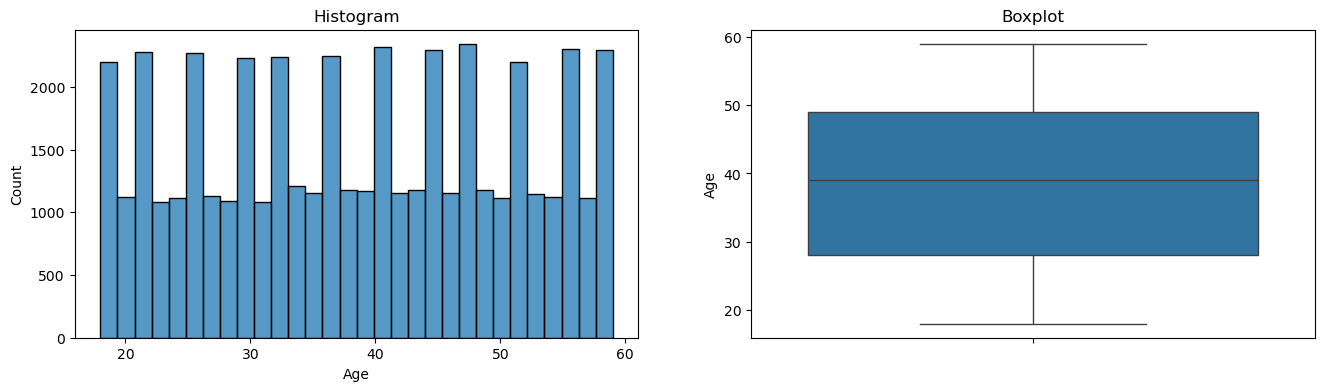


Age - After Capping


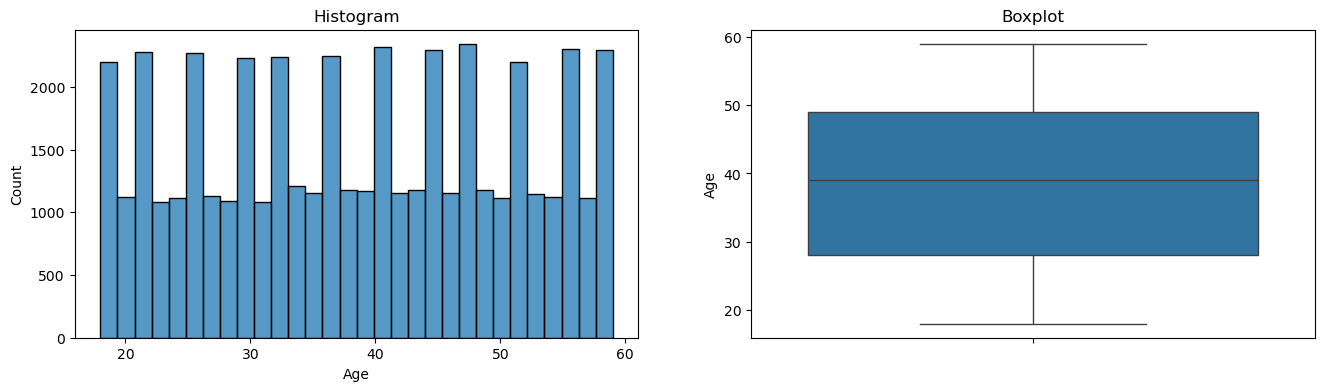

Years at Company - Before Capping


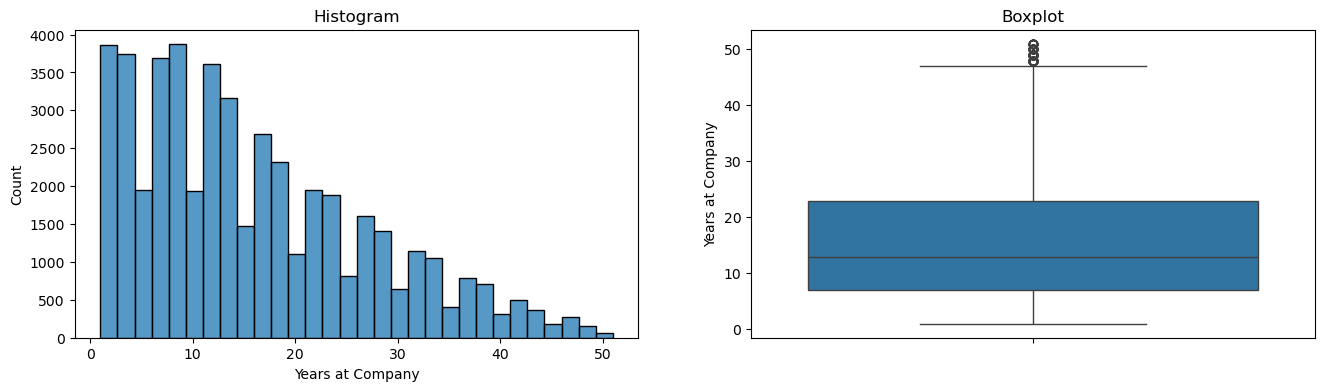


Years at Company - After Capping


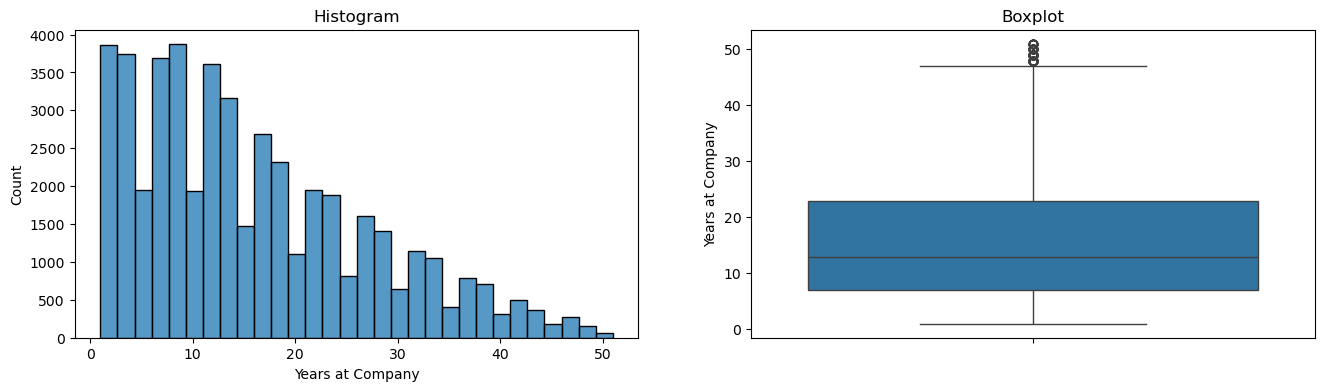

Monthly Income - Before Capping


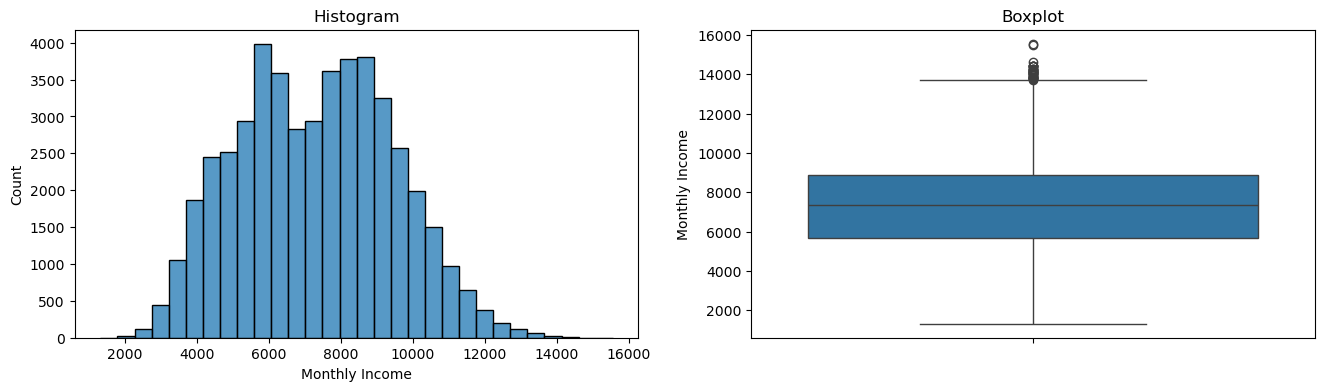


Monthly Income - After Capping


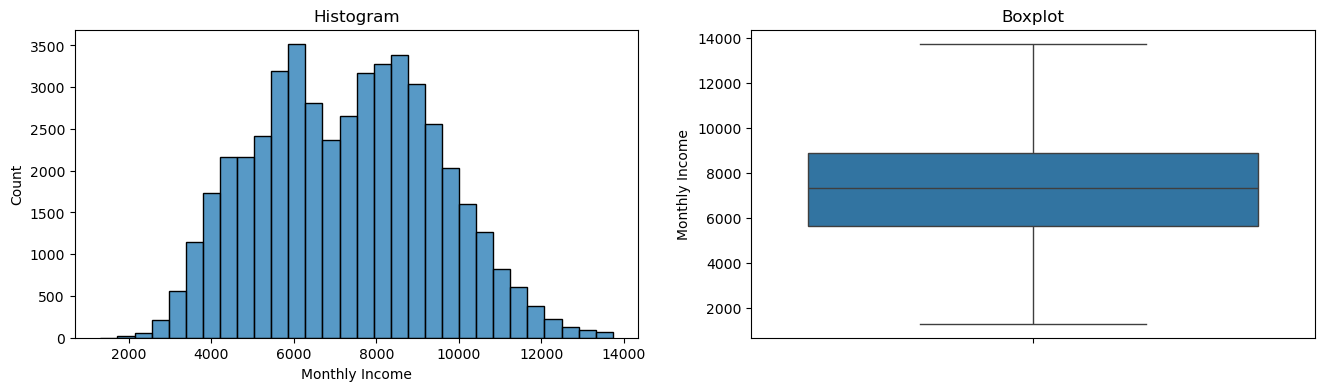

Number of Promotions - Before Capping


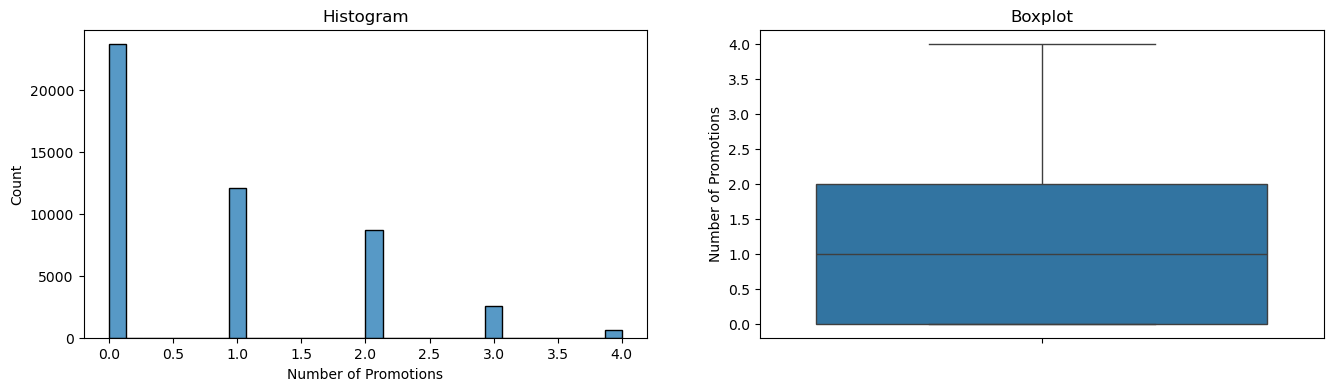


Number of Promotions - After Capping


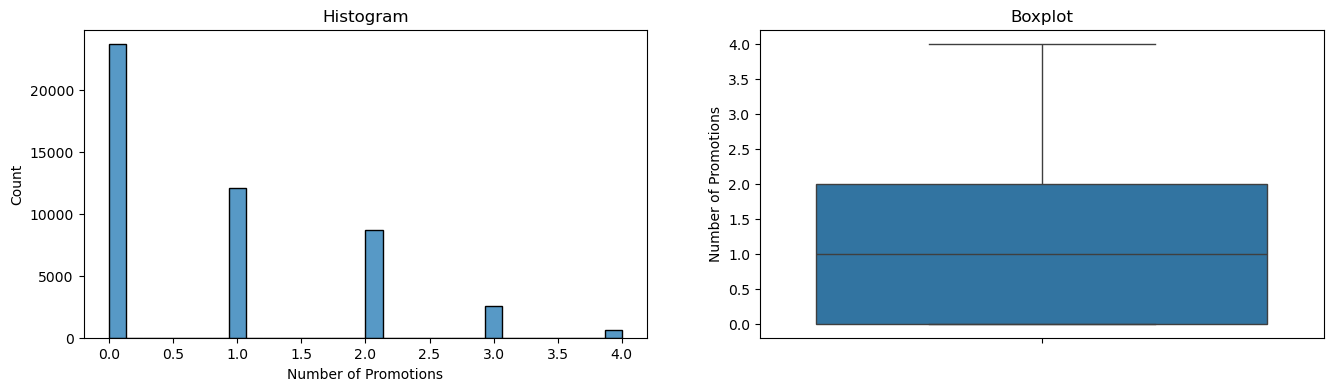

Distance from Home - Before Capping


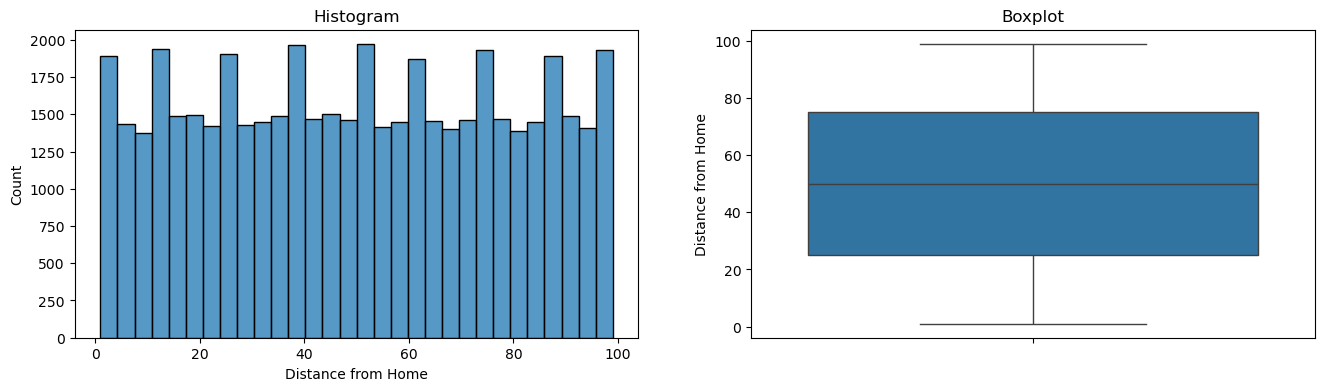


Distance from Home - After Capping


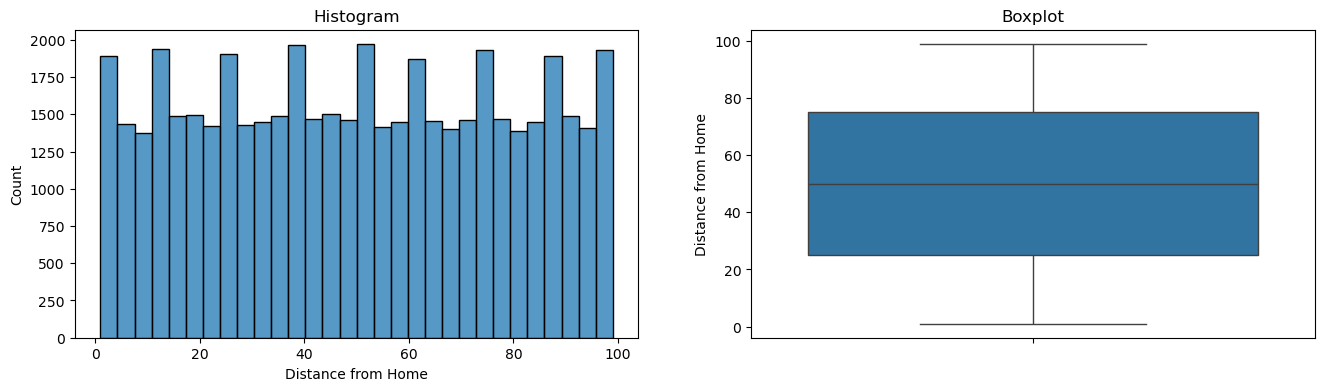

Company Tenure - Before Capping


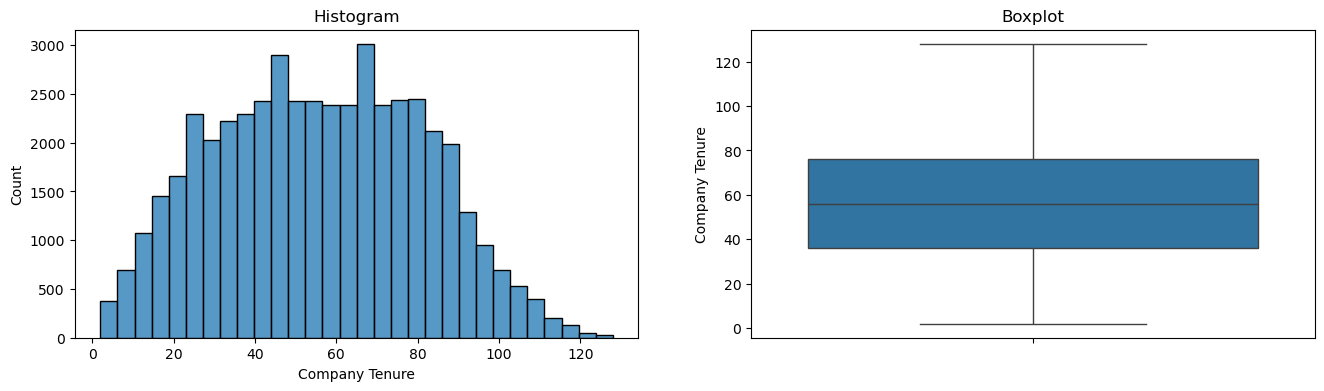


Company Tenure - After Capping


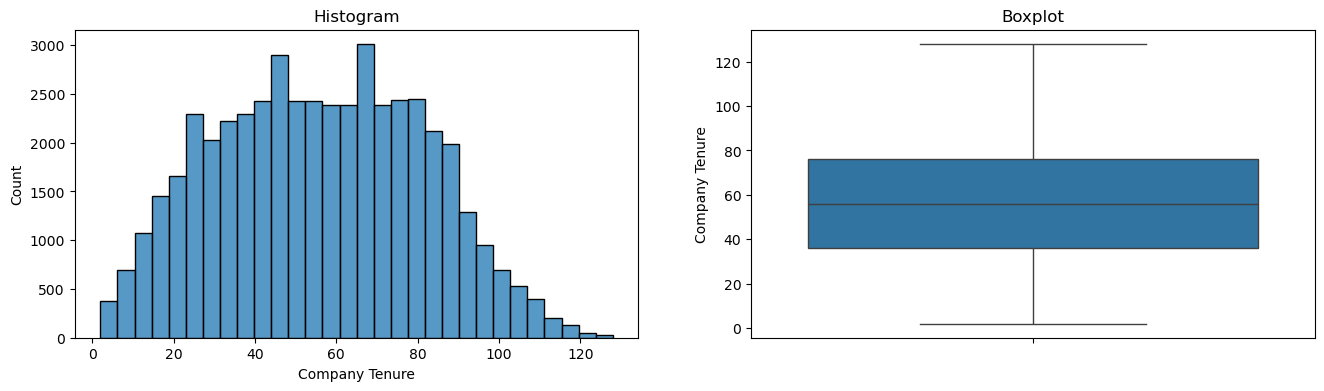

Number of Dependents - Before Capping


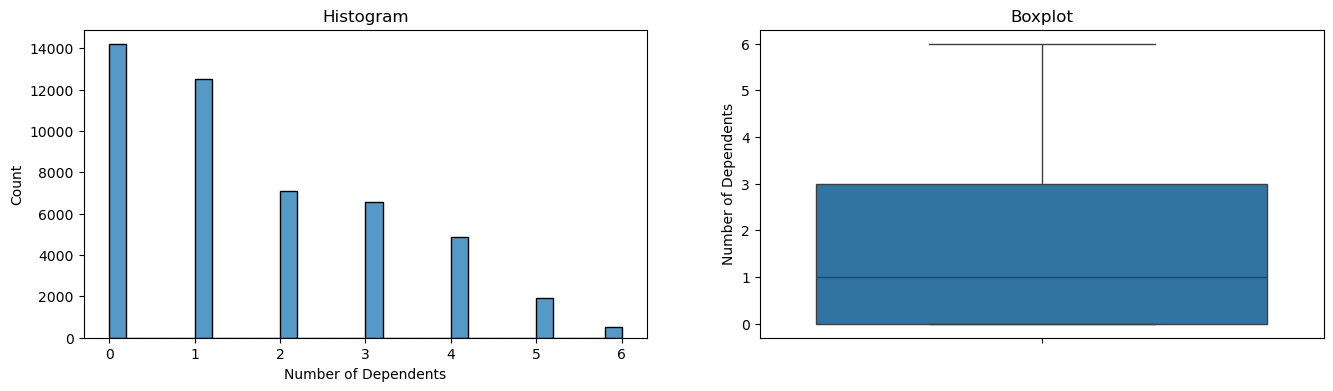


Number of Dependents - After Capping


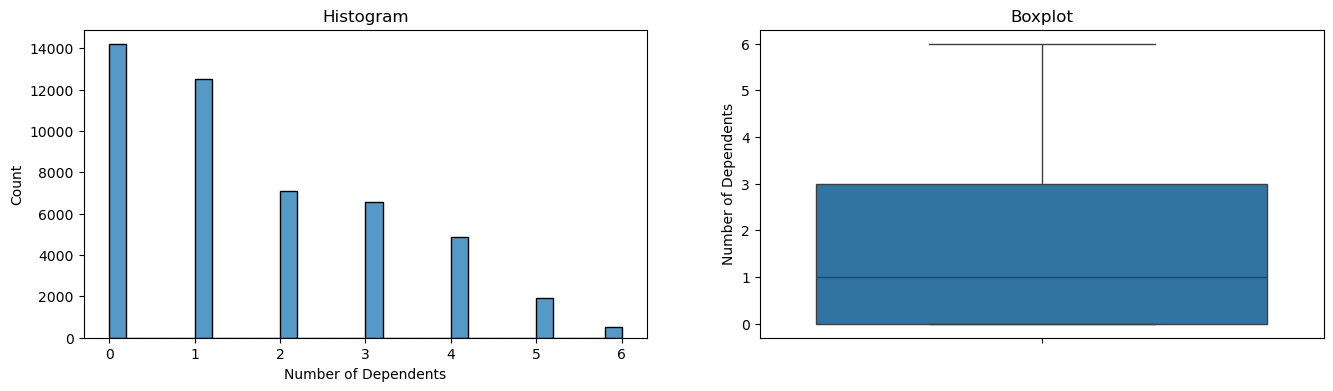

In [31]:
# Check the distribution before and after capping
for col in num_cols_fe:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

Handling outliers done, let's continue to the next step

---
### Feature selection

#### Split numerical and categorical columns

In [32]:
# Categorical features
cat_cols_fe = ['Gender',  'Job Role', 'Work-Life Balance', 'Job Satisfaction',  'Performance Rating', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']

# Numerical Features
num_cols_fe = [ 'Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Company Tenure', 'Number of Dependents']

X_train_num = X_train_capped[num_cols_fe]
X_test_num = X_test_capped[num_cols_fe]

X_train_cat = X_train_capped[cat_cols_fe]
X_test_cat = X_test_capped[cat_cols_fe]


#### Checking correlation with target

##### Categorical columns

In [33]:
# Set the significance level (alpha)
alpha = 0.05

# Initialize an empty list to store the results
chi2_results = []

# Perform chi-squared test for each categorical column
for cat_column in X_train_cat:
    # Create contingency table
    contingency_table = pd.crosstab(X_train_cat[cat_column], y_train)
    
    # Perform chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Check if p-value is less than significance level (alpha)
    is_correlated = 'Yes' if p < alpha else 'No'
    
    # Append the result as a dictionary
    chi2_results.append({
        'categorical_column': cat_column,
        'chi2-statistic': chi2,
        'p-value': p,
        'is_correlated': is_correlated
    })

# Convert the list of dictionaries into a DataFrame
correlation_df_categorical = pd.DataFrame(chi2_results)

# Show the results
correlation_df_categorical


,categorical_column,chi2-statistic,p-value,is_correlated
0,Gender,537.950225,5.264514e-119,Yes
1,Job Role,14.312385,6.361985e-03,Yes
2,Work-Life Balance,1748.937559,0.000000e+00,Yes
3,Job Satisfaction,217.028781,8.810187e-47,Yes
4,Performance Rating,165.833944,1.009227e-35,Yes
5,Education Level,558.634080,1.386119e-119,Yes
6,Marital Status,3813.766970,0.000000e+00,Yes
7,Job Level,4737.685380,0.000000e+00,Yes
8,Company Size,41.759408,8.551843e-10,Yes
9,Remote Work,2305.243099,0.000000e+00,Yes


The result above show that `Leadership Opportunities` & `Employee Recognition` categories have no correlation with the target variable

In [34]:
X_train_final = X_train_capped.drop(columns=['Leadership Opportunities', 'Employee Recognition'])
X_test_final = X_test_capped.drop(columns=['Leadership Opportunities', 'Employee Recognition'])

##### Numerical columns

In [35]:
def check_correlation(data, target):
    target_series = target.squeeze() if isinstance(target, pd.DataFrame) else target
    results = []

    for col in data.columns:
        # Compute the Kendall correlation directly for numeric columns
        cor_value, p_val = stats.kendalltau(data[col], target_series)

        # Categorize the correlation result
        if cor_value > 0.5:
            correlation = "Strong Positive"
        elif 0 < cor_value <= 0.5:
            correlation = "Weak Positive"
        elif cor_value == 0:
            correlation = "No Correlation"
        elif -0.5 < cor_value < 0:
            correlation = "Weak Negative"
        else:
            correlation = "Strong Negative"

        # Append the results
        results.append({
            'Feature': col,
            'Method': 'Kendall',
            'Cor-Value': cor_value,
            'P-Value': p_val,
            'Result': correlation
        })

    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)
    return results_df

# Call the function with your data
check_correlation(X_train_num, y_train)


,Feature,Method,Cor-Value,P-Value,Result
0,Age,Kendall,0.038838,1.018217e-24,Weak Positive
1,Years at Company,Kendall,0.060964,4.166920e-58,Weak Positive
2,Monthly Income,Kendall,0.011954,1.390546e-03,Weak Positive
3,Number of Promotions,Kendall,0.057782,1.510990e-41,Weak Positive
4,Distance from Home,Kendall,-0.077727,5.068952e-95,Weak Negative
5,Company Tenure,Kendall,0.024646,5.527771e-11,Weak Positive
6,Number of Dependents,Kendall,0.060559,2.184460e-49,Weak Positive


Most of the features have weak correlations with the target variable, but all the correlations are statistically significant. Even though these correlations are weak, they indicate that factors like years at the company, promotions, and number of dependents could have some influence on the target variable.

--- 
### Encoding and Scaling

The numerical data is not on the same scale, so we need a scaler to help the model perform better. In this process, we will use **Standard Scaler** as the scaling method and combine it later in the pipeline to avoid data leakage since it can be a good practice even after handling outliers. For the categorical we will try to use **One Hot Encoder**,**Ordinal Encoder** and **Label Encoder** since our data is nominal type

In [36]:
# Define the Scaling method
scaler = StandardScaler()

# Define the Encoder
# Nominal encoder
nominal_encoder = OneHotEncoder(handle_unknown='ignore')

#ordinal encoder
ordinal_encoder = OrdinalEncoder()


In [37]:
# Encoding target
target_encode = LabelEncoder()
y_train_final = target_encode.fit_transform(y_train)
y_test_final = target_encode.fit_transform(y_test)

In [38]:
# Define categorical columns
nominal_encode = ['Gender','Job Role','Marital Status','Remote Work','Innovation Opportunities']
ordinal_encode = ['Work-Life Balance','Job Satisfaction','Performance Rating','Education Level','Job Level','Company Size']

# Define the fix numerical columns
num_cols_scaling = ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Company Tenure', 'Number of Dependents']

# Define pipelines explicitly
num_pipeline = Pipeline([
    ('scaler', StandardScaler())  # Apply StandarScaler to numerical columns
])

cat_nominal_pipeline = Pipeline([
    ('nominal_encoder', OneHotEncoder(handle_unknown="ignore"))  # Apply OneHotEncoder to categorical columns
])
cat_ordinal_pipeline = Pipeline([
    ('ordinal_encoder',OrdinalEncoder())
])

# Define the ColumnTransformer
preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_cols_scaling),  # Apply numerical pipeline to numerical columns
    ('pipe_cat_nominal', cat_nominal_pipeline, nominal_encode),  # Apply categorical pipeline to categorical columns
    ('pipe_cat_ordinal',cat_ordinal_pipeline, ordinal_encode)  # Pass through some categorical columns as needed
])

In [39]:
preprocessing_pipeline

ColumnTransformer(transformers=[('pipe_num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'Years at Company', 'Monthly Income',
                                  'Number of Promotions', 'Distance from Home',
                                  'Company Tenure', 'Number of Dependents']),
                                ('pipe_cat_nominal',
                                 Pipeline(steps=[('nominal_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Gender', 'Job Role', 'Marital Status',
                                  'Remote Work', 'Innovation Opportunities']),
                                ('pipe_cat_ordinal',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder())]),
                                 ['Work-Life Balance', 'Job Satisfaction',
                                  'Performance Rating', 'Education Level',
                                  'Job Level', 'Company Size'])])

## 6. Model Definition

Here are the models that will be used:
1. **Random Forest**
- Random Forest is an ensemble technique that builds multiple decision trees and aggregates their predictions to enhance classification accuracy and reduce overfitting, making it capable of capturing complex patterns in the data.

2. **Support Vector Machine (SVM)**
- SVM is a robust algorithm that identifies a hyperplane in the feature space, aiming to maximize the margin between classes, which makes it well-suited for classifying data that is not linearly separable.

3. **XGBoost**
- XGBoost is a gradient boosting method that improves the performance of weak learners, often decision trees, by iteratively optimizing a loss function. It's widely recognized for its accuracy and speed in making predictions.

4. **Decision Tree:**
- A Decision Tree splits the data into binary decisions at each node based on feature values, resulting in a flowchart-like structure. It’s a straightforward model that can handle complex decision boundaries and is easy to interpret.

5. **K-Nearest Neighbors (KNN)**
- KNN is a simple classification algorithm that assigns a class to a data point based on the majority class of its nearest neighbors (k) in the feature space, making it intuitive and effective for many problems.

**Metrics**

In the context of predicting employee attrition, the primary goal is to minimize the cases where the model fails to identify employees who are likely to leave the company. So we will use `Recall` metric for this case.

A higher Recall indicates that the model accurately identifies more employees who are at risk of attrition, aligning with the company's goal to take proactive measures in retaining valuable staff. While Recall is prioritized, maintaining an acceptable level of precision is also important to avoid excessive false negatives, which would lead to missed opportunities for intervention.

In addition to Recall, `ROC-AUC` will be used to evaluate the model’s ability to distinguish between employees likely to stay and those at risk of leaving. Considering potential class imbalance in the dataset, ROC-AUC offers insights into the model’s overall performance.

Focusing on Recall helps ensure that the organization can implement timely retention strategies, effectively reducing attrition rates and maintaining a stable workforce.

## 7. Model Training & Evaluation

To decide which model works best, the grid search cross validation will be used in the model training process. The top-performing model will then be chosen, and its performance will be improved through hyperparameter tuning.

In [40]:
# Define all Model
Random_Forest = Pipeline([('preprocessor', preprocessing_pipeline), 
                          ('classifier', RandomForestClassifier(random_state=313))])
SVM_model = Pipeline([('preprocessor', preprocessing_pipeline), 
                      ('classifier', SVC(random_state=313, probability=True))])
KNN_model = Pipeline([('preprocessor', preprocessing_pipeline), 
                      ('classifier', KNeighborsClassifier())])
Decision_Tree_model = Pipeline([('preprocessor', preprocessing_pipeline),
                                 ('classifier', DecisionTreeClassifier(random_state=313))])
xgb_model = Pipeline([('preprocessor', preprocessing_pipeline), 
                      ('classifier', xgb.XGBClassifier(random_state=313))])

### Random Forest Model
---

#### Model Training

In [41]:
Random_Forest.fit(X_train_final, y_train_final)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years at Company',
                                                   'Monthly Income',
                                                   'Number of Promotions',
                                                   'Distance from Home',
                                                   'Company Tenure',
                                                   'Number of Dependents']),
                                                 ('pipe_cat_nominal',
                                                  Pipeline(steps=[('nominal_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Job Role',
                                                   'Marital Status',
                                                   'Remote Work',
                                                   'Innovation Opportunities']),
                                                 ('pipe_cat_ordinal',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Work-Life Balance',
                                                   'Job Satisfaction',
                                                   'Performance Rating',
                                                   'Education Level',
                                                   'Job Level',
                                                   'Company Size'])])),
                ('classifier', RandomForestClassifier(random_state=313))])

#### Model Evaluation

In [42]:
# Check Performance Model against Train-Set

y_pred_train_random_forest = Random_Forest.predict(X_train_final)
print('Recall Score - Train Set  : ', recall_score(y_train_final, y_pred_train_random_forest), '\n')
print('Classification Train Report : \n', classification_report(y_train_final, y_pred_train_random_forest), '\n')

y_pred_test_random_forest = Random_Forest.predict(X_test_final)
print('Recall Score - Train Set  : ', recall_score(y_test_final, y_pred_test_random_forest), '\n')
print('Classification Test Report : \n', classification_report(y_test_final, y_pred_test_random_forest), '\n')

Recall Score - Train Set  :  1.0 

Classification Train Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22598
           1       1.00      1.00      1.00     25080

    accuracy                           1.00     47678
   macro avg       1.00      1.00      1.00     47678
weighted avg       1.00      1.00      1.00     47678
 

Recall Score - Train Set  :  0.7430420711974111 

Classification Test Report : 
               precision    recall  f1-score   support

           0       0.72      0.73      0.73      5740
           1       0.74      0.74      0.74      6180

    accuracy                           0.73     11920
   macro avg       0.73      0.73      0.73     11920
weighted avg       0.73      0.73      0.73     11920
 



- The train recall score from Random forest model is 1.00%, and the test recall score is 0.744%.
- Because result of train is greater than test and the difference between train and test is still present, it's representing the model is overfitting.

--- 
### SVM Model

#### Model Training

In [ ]:
SVM_model.fit(X_train_final,y_train_final)

#### Model Evaluation

In [ ]:
# Check Performance Model against Train-Set

y_pred_train_svm = SVM_model.predict(X_train_final)
print('Recall Score - Train Set  : ', recall_score(y_train_final, y_pred_train_svm), '\n')
print('Classification Train Report : \n', classification_report(y_train_final, y_pred_train_svm), '\n')

y_pred_test_svm = SVM_model.predict(X_test_final)
print('Recall Score - Train Set  : ', recall_score(y_test_final, y_pred_test_svm), '\n')
print('Classification Test Report : \n', classification_report(y_test_final, y_pred_test_svm), '\n')

Recall Score - Train Set  :  0.7761961722488038 

Classification Train Report : 
               precision    recall  f1-score   support

           0       0.75      0.74      0.74     22598
           1       0.76      0.78      0.77     25080

    accuracy                           0.76     47678
   macro avg       0.76      0.76      0.76     47678
weighted avg       0.76      0.76      0.76     47678
 

Recall Score - Train Set  :  0.7559870550161812 

Classification Test Report : 
               precision    recall  f1-score   support

           0       0.73      0.72      0.72      5740
           1       0.74      0.76      0.75      6180

    accuracy                           0.74     11920
   macro avg       0.74      0.74      0.74     11920
weighted avg       0.74      0.74      0.74     11920
 



- The train recall score from SVM model is 0.77%, and the test recall score is 0.75%.
- The recall score of the SVM model indicates a good fit because the difference between the prediction results on the test and training data is minimal.

--- 
### KNN Model 

#### Model Training

In [ ]:
KNN_model.fit(X_train_final,y_train_final)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years at Company',
                                                   'Monthly Income',
                                                   'Number of Promotions',
                                                   'Distance from Home',
                                                   'Company Tenure',
                                                   'Number of Dependents']),
                                                 ('pipe_cat_nominal',
                                                  Pipeline(steps=[('nominal_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Job Role',
                                                   'Marital Status',
                                                   'Remote Work',
                                                   'Innovation Opportunities']),
                                                 ('pipe_cat_ordinal',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Work-Life Balance',
                                                   'Job Satisfaction',
                                                   'Performance Rating',
                                                   'Education Level',
                                                   'Job Level',
                                                   'Company Size'])])),
                ('classifier', KNeighborsClassifier())])

#### Model Evaluation

In [ ]:
# Check Performance Model against Train-Set

y_pred_train_knn = KNN_model.predict(X_train_final)
print('Recall Score - Train Set  : ', recall_score(y_train_final, y_pred_train_knn), '\n')
print('Classification Train Report : \n', classification_report(y_train_final, y_pred_train_knn), '\n')

y_pred_test_knn = KNN_model.predict(X_test_final)
print('Recall Score - Train Set  : ', recall_score(y_test_final, y_pred_test_knn), '\n')
print('Classification Test Report : \n', classification_report(y_test_final, y_pred_test_knn), '\n')

Recall Score - Train Set  :  0.7797049441786283 

Classification Train Report : 
               precision    recall  f1-score   support

           0       0.76      0.78      0.77     22598
           1       0.80      0.78      0.79     25080

    accuracy                           0.78     47678
   macro avg       0.78      0.78      0.78     47678
weighted avg       0.78      0.78      0.78     47678
 

Recall Score - Train Set  :  0.6632686084142395 

Classification Test Report : 
               precision    recall  f1-score   support

           0       0.65      0.67      0.66      5740
           1       0.68      0.66      0.67      6180

    accuracy                           0.67     11920
   macro avg       0.67      0.67      0.67     11920
weighted avg       0.67      0.67      0.67     11920
 



- The train recall score from KNN model is 0.77%, and the test recall score is 0.66%.
- The recall score of the KNN model indicates a overfit because the difference between the prediction results on the test and training data is large.

---
### Decision Tree Model

#### Model Training

In [ ]:
Decision_Tree_model.fit(X_train_final,y_train_final)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years at Company',
                                                   'Monthly Income',
                                                   'Number of Promotions',
                                                   'Distance from Home',
                                                   'Company Tenure',
                                                   'Number of Dependents']),
                                                 ('pipe_cat_nominal',
                                                  Pipeline(steps=[('nominal_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Job Role',
                                                   'Marital Status',
                                                   'Remote Work',
                                                   'Innovation Opportunities']),
                                                 ('pipe_cat_ordinal',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Work-Life Balance',
                                                   'Job Satisfaction',
                                                   'Performance Rating',
                                                   'Education Level',
                                                   'Job Level',
                                                   'Company Size'])])),
                ('classifier', DecisionTreeClassifier(random_state=313))])

#### Model Evaluation

In [ ]:
# Check Performance Model against Train-Set

# Check Performance Model against Train-Set

y_pred_train_decision_tree = Decision_Tree_model.predict(X_train_final)
print('Recall Score - Train Set  : ', recall_score(y_train_final, y_pred_train_decision_tree), '\n')
print('Classification Train Report : \n', classification_report(y_train_final, y_pred_train_decision_tree), '\n')

y_pred_test_decision_tree = Decision_Tree_model.predict(X_test_final)
print('Recall Score - Train Set  : ', recall_score(y_test_final, y_pred_test_decision_tree), '\n')
print('Classification Test Report : \n', classification_report(y_test_final, y_pred_test_decision_tree), '\n')

Recall Score - Train Set  :  1.0 

Classification Train Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22598
           1       1.00      1.00      1.00     25080

    accuracy                           1.00     47678
   macro avg       1.00      1.00      1.00     47678
weighted avg       1.00      1.00      1.00     47678
 

Recall Score - Train Set  :  0.6825242718446602 

Classification Test Report : 
               precision    recall  f1-score   support

           0       0.65      0.64      0.64      5740
           1       0.67      0.68      0.68      6180

    accuracy                           0.66     11920
   macro avg       0.66      0.66      0.66     11920
weighted avg       0.66      0.66      0.66     11920
 



- The train recall score from Random forest model is 1.00%, and the test recall score is 0.68%.
- Because result of train is greater than test and the difference between train and test is still present, it's representing the model is overfitting.

--- 
### XGBoost Model

#### Model Training

In [ ]:
xgb_model.fit(X_train_final,y_train_final)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years at Company',
                                                   'Monthly Income',
                                                   'Number of Promotions',
                                                   'Distance from Home',
                                                   'Company Tenure',
                                                   'Number of Dependents']),
                                                 ('pipe_cat_nominal',
                                                  Pipeline(steps=[('nominal_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'J...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=313, ...))])

#### Model Evaluation

In [ ]:
# Check Performance Model against Train-Set

y_pred_train_xgb = xgb_model.predict(X_train_final)
print('Recall Score - Train Set  : ', recall_score(y_train_final, y_pred_train_xgb), '\n')
print('Classification Train Report : \n', classification_report(y_train_final, y_pred_train_xgb), '\n')

y_pred_test_xgb = xgb_model.predict(X_test_final)
print('Recall Score - Train Set  : ', recall_score(y_test_final, y_pred_test_xgb), '\n')
print('Classification Test Report : \n', classification_report(y_test_final, y_pred_test_xgb), '\n')

Recall Score - Train Set  :  0.8312200956937799 

Classification Train Report : 
               precision    recall  f1-score   support

           0       0.81      0.82      0.82     22598
           1       0.83      0.83      0.83     25080

    accuracy                           0.82     47678
   macro avg       0.82      0.82      0.82     47678
weighted avg       0.82      0.82      0.82     47678
 

Recall Score - Train Set  :  0.7543689320388349 

Classification Test Report : 
               precision    recall  f1-score   support

           0       0.73      0.73      0.73      5740
           1       0.75      0.75      0.75      6180

    accuracy                           0.74     11920
   macro avg       0.74      0.74      0.74     11920
weighted avg       0.74      0.74      0.74     11920
 



- The train recall score from Xgb model is 0.83%, and the test recall score is 0.75%.
- The recall score of the Xgb model indicates a overfit because the difference between the prediction results on the test and training data is large.

### Cross Validation

In [ ]:
pres_train_cross_val_knn = cross_val_score(KNN_model,
                                     X_train_final,
                                     y_train_final,
                                     cv=5,
                                     scoring="recall")

pres_train_cross_val_svm = cross_val_score(SVM_model,
                                     X_train_final,
                                     y_train_final,
                                     cv=5,
                                     scoring="recall")

pres_train_cross_val_tree = cross_val_score(Decision_Tree_model,
                                     X_train_final,
                                     y_train_final,
                                     cv=5,
                                     scoring="recall")

pres_train_cross_val_rf = cross_val_score(Random_Forest,
                                     X_train_final,
                                     y_train_final,
                                     cv=5,
                                     scoring="recall")

pres_train_cross_val_xgb = cross_val_score(xgb_model,
                                     X_train_final,
                                     y_train_final,
                                     cv=5,
                                     scoring="recall")

In [ ]:
all_reports = {}
def performance_report(all_reports, pres_train_cross_val, y_train_final, y_pred_train, y_test, y_pred_test, name):
  score_reports = {
      'train - recall' : recall_score(y_train_final, y_pred_train),
      'train - crossval_recall' : pres_train_cross_val.mean(),
      'test - recall' : recall_score(y_test, y_pred_test),
      'test - weighted recall': recall_score(y_test, y_pred_test, average='weighted')
  }
  all_reports[name] = score_reports
  return all_reports

# KNN
all_reports = performance_report(all_reports, pres_train_cross_val_knn, y_train_final, y_pred_train_knn, y_test_final, y_pred_test_knn, 'KNN - Baseline (Default Hyperparameter)')
# SVM
all_reports = performance_report(all_reports, pres_train_cross_val_svm, y_train_final, y_pred_train_svm, y_test_final, y_pred_test_svm, 'SVM - Baseline (Default Hyperparameter)')
# Decision Tree
all_reports = performance_report(all_reports, pres_train_cross_val_tree, y_train_final, y_pred_train_decision_tree, y_test_final, y_pred_test_decision_tree, 'D Tree - Baseline (Default Hyperparameter)')
# Random Forest
all_reports = performance_report(all_reports, pres_train_cross_val_rf, y_train_final, y_pred_train_random_forest, y_test_final, y_pred_test_random_forest, 'R Forest - Baseline (Default Hyperparameter)')
# XGBoost
all_reports = performance_report(all_reports, pres_train_cross_val_xgb, y_train_final, y_pred_train_xgb, y_test_final, y_pred_test_xgb, 'XGBoost - Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports)

,KNN - Baseline (Default Hyperparameter),SVM - Baseline (Default Hyperparameter),D Tree - Baseline (Default Hyperparameter),R Forest - Baseline (Default Hyperparameter),XGBoost - Baseline (Default Hyperparameter)
train - recall,0.779705,0.776196,1.000000,1.000000,0.831220
train - crossval_recall,0.654705,0.753509,0.670016,0.748405,0.754506
test - recall,0.663269,0.755987,0.682524,0.744660,0.754369
test - weighted recall,0.665604,0.736997,0.660738,0.734060,0.742450


Based on the recall score analysis, the XGBoost model demonstrates the best predictive performance, achieving a test prediction score of 0.754369. This score is closely aligned with the cross-validation score of 0.754506, suggesting that the model provides a good fit; however, there is still potential for enhancing its performance. When compared to other models, XGBoost stands out as the most appropriate algorithm for this dataset, as the other models display tendencies of overfitting, indicated by their prediction results.
Next we will try test roc_auc score to choose best model we gonna use for this project 

### Model Evaluation roc_auc

In [ ]:
# Make predictions using the best estimator
y_pred_proba = Random_Forest.predict_proba(X_test_final)[:, 1]
roc_auc = roc_auc_score(y_test_final, y_pred_proba)

# Define function to evaluate roc_auc_score
def evaluate_roc_auc(roc_auc):
    if roc_auc > 0.9:
        return "Good"
    elif roc_auc >= 0.8:
        return "Fair"
    elif roc_auc >= 0.7:
        return "Decent"
    elif roc_auc >= 0.6:
        return "Not Great"
    else:
        return "Poor"

# Evaluate model
evaluation_result = evaluate_roc_auc(roc_auc)

# Print results

# Test
print(f"\nROC AUC Score: {roc_auc:.4f} - Evaluation: {evaluation_result}")
print("\nClassification Report (Test):")
print(classification_report(y_test_final, Random_Forest.predict(X_test_final)))  # Evaluasi pada data testing



ROC AUC Score: 0.8216 - Evaluation: Fair

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      5740
           1       0.74      0.74      0.74      6180

    accuracy                           0.73     11920
   macro avg       0.73      0.73      0.73     11920
weighted avg       0.73      0.73      0.73     11920



- The model achieved an accuracy of 73%, which means it correctly predicted 73% of the instances in the test set
- The ROC AUC score of 0.8216 is considered fair. It indicates that the model's ability to distinguish between positive and negative classes is reasonably good, but not excellent.

In [ ]:
# Make predictions using the best estimator
y_pred_proba = SVM_model.predict_proba(X_test_final)[:, 1]
roc_auc = roc_auc_score(y_test_final, y_pred_proba)

# Define function to evaluate roc_auc_score
def evaluate_roc_auc(roc_auc):
    if roc_auc > 0.9:
        return "Good"
    elif roc_auc >= 0.8:
        return "Fair"
    elif roc_auc >= 0.7:
        return "Decent"
    elif roc_auc >= 0.6:
        return "Not Great"
    else:
        return "Poor"

# Evaluate model
evaluation_result = evaluate_roc_auc(roc_auc)

# Print results
# Test
print(f"\nROC AUC Score: {roc_auc:.4f} - Evaluation: {evaluation_result}")
print("\nClassification Report (Test):")
print(classification_report(y_test_final, SVM_model.predict(X_test_final)))  # Evaluasi pada data testing



ROC AUC Score: 0.8197 - Evaluation: Fair

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      5740
           1       0.74      0.76      0.75      6180

    accuracy                           0.74     11920
   macro avg       0.74      0.74      0.74     11920
weighted avg       0.74      0.74      0.74     11920



In [ ]:
# Make predictions using the best estimator
y_pred_proba = KNN_model.predict_proba(X_test_final)[:, 1]
roc_auc = roc_auc_score(y_test_final, y_pred_proba)

# Define function to evaluate roc_auc_score
def evaluate_roc_auc(roc_auc):
    if roc_auc > 0.9:
        return "Good"
    elif roc_auc >= 0.8:
        return "Fair"
    elif roc_auc >= 0.7:
        return "Decent"
    elif roc_auc >= 0.6:
        return "Not Great"
    else:
        return "Poor"

# Evaluate model
evaluation_result = evaluate_roc_auc(roc_auc)

# Print results
# Test
print(f"\nROC AUC Score: {roc_auc:.4f} - Evaluation: {evaluation_result}")
print("\nClassification Report (Test):")
print(classification_report(y_test_final, KNN_model.predict(X_test_final)))  # Evaluasi pada data testing



ROC AUC Score: 0.7178 - Evaluation: Decent

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      5740
           1       0.68      0.66      0.67      6180

    accuracy                           0.67     11920
   macro avg       0.67      0.67      0.67     11920
weighted avg       0.67      0.67      0.67     11920



In [ ]:
# Make predictions using the best estimator
y_pred_proba = Decision_Tree_model.predict_proba(X_test_final)[:, 1]
roc_auc = roc_auc_score(y_test_final, y_pred_proba)

# Define function to evaluate roc_auc_score
def evaluate_roc_auc(roc_auc):
    if roc_auc > 0.9:
        return "Good"
    elif roc_auc >= 0.8:
        return "Fair"
    elif roc_auc >= 0.7:
        return "Decent"
    elif roc_auc >= 0.6:
        return "Not Great"
    else:
        return "Poor"

# Evaluate model
evaluation_result = evaluate_roc_auc(roc_auc)

# Print results

# Test
print(f"\nROC AUC Score: {roc_auc:.4f} - Evaluation: {evaluation_result}")
print("\nClassification Report (Test):")
print(classification_report(y_test_final, Decision_Tree_model.predict(X_test_final)))  # Evaluasi pada data testing



ROC AUC Score: 0.6599 - Evaluation: Not Great

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      5740
           1       0.67      0.68      0.68      6180

    accuracy                           0.66     11920
   macro avg       0.66      0.66      0.66     11920
weighted avg       0.66      0.66      0.66     11920



In [ ]:
# Make predictions using the best estimator
y_pred_proba = xgb_model.predict_proba(X_test_final)[:, 1]
roc_auc = roc_auc_score(y_test_final, y_pred_proba)

# Define function to evaluate roc_auc_score
def evaluate_roc_auc(roc_auc):
    if roc_auc > 0.9:
        return "Good"
    elif roc_auc >= 0.8:
        return "Fair"
    elif roc_auc >= 0.7:
        return "Decent"
    elif roc_auc >= 0.6:
        return "Not Great"
    else:
        return "Poor"

# Evaluate model
evaluation_result = evaluate_roc_auc(roc_auc)

# Print results

# Test
print(f"\nROC AUC Score: {roc_auc:.4f} - Evaluation: {evaluation_result}")
print("\nClassification Report (Test):")
print(classification_report(y_test_final, xgb_model.predict(X_test_final)))  # Evaluasi pada data testing



ROC AUC Score: 0.8327 - Evaluation: Fair

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      5740
           1       0.75      0.75      0.75      6180

    accuracy                           0.74     11920
   macro avg       0.74      0.74      0.74     11920
weighted avg       0.74      0.74      0.74     11920



Overall, the model's performance is moderate. It can correctly predict both classes to a certain extent, but there is still room for improvement, especially in terms of precision and recall for class 0. To enhance the model's performance, you might consider **Hyperparameter Tuning**   
if we see the ROC-AUC score of those model, the best one is `XGBoost`, Next we will try experiment with different hyperparameters to optimize the model's performance.

### Hyperparameter Tuning

In [ ]:
# Get best params
xgb_model.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('pipe_num',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    ['Age', 'Years at Company', 'Monthly Income',
                                     'Number of Promotions', 'Distance from Home',
                                     'Company Tenure', 'Number of Dependents']),
                                   ('pipe_cat_nominal',
                                    Pipeline(steps=[('nominal_encoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['Gender', 'Job Role', 'Marital Status',
                                     'Remote Work', 'Innovation Opportunities']),
                                   ('pipe_cat_ordinal',
                                    Pipeline(steps=[('ordinal_encoder',
                                                     OrdinalEncode

In [ ]:
# Define Hyperparameters for RandomizedSearchCV
# Define the parameter distribution for random search
param_dist = {
    'classifier__n_estimators': randint(100, 1000),          # Number of trees
    'classifier__learning_rate': [0.01, 0.1, 0.2],         # Step size shrinkage
    'classifier__max_depth': randint(3, 15),               # Maximum depth of the tree
    'classifier__min_child_weight': randint(1, 10),        # Minimum sum of instance weight (hessian) needed in a child
    'classifier__subsample': [0.8, 0.9, 1.0],             # Fraction of samples used for fitting the trees
    'classifier__colsample_bytree': [0.8, 0.9, 1.0],      # Fraction of features used for fitting the trees
    'classifier__gamma': [0, 0.1, 0.2],                   # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'classifier__reg_alpha': [0, 0.1, 0.2],               # L1 regularization term on weights
    'classifier__reg_lambda': [0, 0.1, 0.2],              # L2 regularization term on weights
}

# Initialize Stratified K-Fold cross-validator
skfold = StratifiedKFold(n_splits=5)

# Conduct the Randomized Search
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, cv=skfold, scoring='recall', n_iter=10, n_jobs=-1, random_state=101)
random_search.fit(X_train_final, y_train_final)


# Fit the model with Random Search
random_search.fit(X_train_final, y_train_final)

# Get the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'classifier__colsample_bytree': 0.9, 'classifier__gamma': 0.1, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 7, 'classifier__min_child_weight': 4, 'classifier__n_estimators': 199, 'classifier__reg_alpha': 0, 'classifier__reg_lambda': 0.2, 'classifier__subsample': 0.8}
Best Score: 0.7635964912280702


- Best Score of best model : 0.7635964912280702
- The best parameters we obtained:   
    - `{'classifier__colsample_bytree': 0.9, 'classifier__gamma': 0.1, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 7, 'classifier__min_child_weight': 4, 'classifier__n_estimators': 199, 'classifier__reg_alpha': 0, 'classifier__reg_lambda': 0.2, 'classifier__subsample': 0.8}`

In [ ]:
# Define Best Model
best_model = random_search.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years at Company',
                                                   'Monthly Income',
                                                   'Number of Promotions',
                                                   'Distance from Home',
                                                   'Company Tenure',
                                                   'Number of Dependents']),
                                                 ('pipe_cat_nominal',
                                                  Pipeline(steps=[('nominal_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'J...
                               feature_types=None, gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None, min_child_weight=4,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=199,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=313, ...))])

Recall - Test Set   :  0.7608414239482201 

Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      5740
           1       0.76      0.76      0.76      6180

    accuracy                           0.75     11920
   macro avg       0.75      0.75      0.75     11920
weighted avg       0.75      0.75      0.75     11920
 

Confusion Matrix      : 


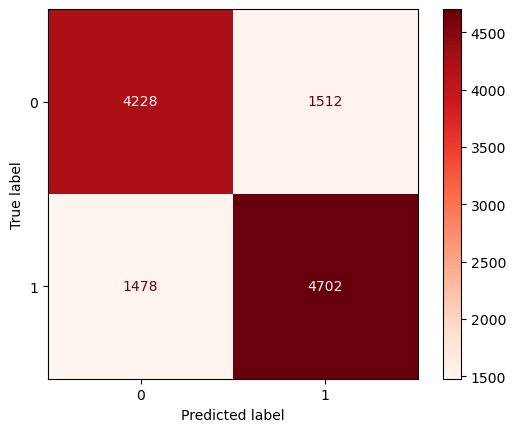

In [ ]:
# Check Performance Model against Test-Set

y_pred_test = best_model.predict(X_test_final)

print('Recall - Test Set   : ', recall_score(y_test_final, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test_final, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_model, X_test_final, y_test_final, cmap='Reds'))

In [ ]:
random_result = pd.DataFrame(random_search.cv_results_)
y_pred_test_random = random_search.predict(X_test)

rank_1_row = random_result[random_result['rank_test_score'] == 1]

# Get the mean test score for rank 1
pres_train_cross_val_random = rank_1_row['mean_test_score'].values[0]

print('Recall score :', pres_train_cross_val_random)

Recall score : 0.7635964912280702


In [ ]:
all_reports = performance_report(all_reports, pres_train_cross_val_random, y_train_final, y_pred_train_xgb, y_test_final, y_pred_test_xgb, 'Random Search')
pd.DataFrame(all_reports)

,KNN - Baseline (Default Hyperparameter),SVM - Baseline (Default Hyperparameter),D Tree - Baseline (Default Hyperparameter),R Forest - Baseline (Default Hyperparameter),XGBoost - Baseline (Default Hyperparameter),Random Search
train - recall,0.779705,0.776196,1.000000,1.000000,0.831220,0.831220
train - crossval_recall,0.654705,0.753509,0.670016,0.748405,0.754506,0.763596
test - recall,0.663269,0.755987,0.682524,0.744660,0.754369,0.754369
test - weighted recall,0.665604,0.736997,0.660738,0.734060,0.742450,0.742450


Based on The Tabel we known :
- Score of train crossval recall with XGboost before hyperparameter tuning is lower than score of train crossval recall after hyperparameter tuning 
- The difference is not too significant, but there is still an improvement in the value after hyperparameter tuning.

**Best Model of this project is Xgboost algorithm with hyperparameter tuning, even the result is only 0.76 it is still in good fit**


---
## 8. Model Saving

In [ ]:
# Export the model
with open('model.pkl', 'wb') as file_1 :
    pickle.dump(best_model, file_1)

--- 
## 9.Conclusion

### **Exploratory Data Analysis**


The overall analysis indicates a relatively high employee turnover (attrition) rate, particularly at the early career level.   
 Some key findings that need attention are:

- **Attrition Rate:** The percentage of employees leaving the company is quite significant, approaching 50%. This suggests an underlying issue with employee retention.
- **Impact of Job Level:** The highest turnover rate is seen at the entry level, indicating potential issues with the onboarding process or new employee adaptation.
- **Work-Life Balance:** Mid-level employees experience significant variation in work-life balance, indicating increased job pressure at this level. In contrast, senior employees tend to have better work-life balance.
- **Salary Differences by Job Role:** There are notable differences in average salaries across job roles, with technology-related roles commanding the highest pay.

To reduce the attrition rate and improve employee retention, the company should focus on enhancing the onboarding process, improving work-life balance, providing career development opportunities, evaluating compensation, and strengthening communication. By taking these steps, the company can create a more positive and productive work environment.

### **Model**

- The classification model for detecting employee attrition was successfully developed using the XGBoost algorithm, known for its robustness and efficiency. Benchmarking was performed through cross-validation, confirming the model's reliability and performance.
- The XGBoost model was effectively developed to predict employee attrition, with model benchmarking conducted using cross-validation. This model achieved a commendable recall score of 75% before hyperparameter tuning and a recall score of 76% after hyperparameter tuning.
- The model needs to conduct further analysis that shows the presence of other factors that can significantly affect the model's predictive accuracy.
- To enhance model performance, additional feature engineering and a broader dataset could be beneficial for addressing the identified weaknesses and improving classification outcomes.
- These insights suggest that while the model performs well overall, further investigation into these specific employee characteristics is necessary to improve prediction accuracy and ensure that the HR team can take effective actions based on the model's outputs. Continuous model evaluation and iteration will be essential in enhancing its capabilities and addressing the identified weaknesses.

### **Conceptual Problem**

#### 1. **Background and Operation of Bagging**
- **Background :**   
Bagging is an ensemble method to enhance the accuracy of predictive models. It addresses challenges such as model variability, where single models like decision trees tend to overfit the training data, and prediction errors caused by unstable outcomes influenced by specific training data. 
 
- **How its work:**   
Bagging works by creating multiple subsets of the original training dataset through bootstrap sampling, training independent models on each subset, and then aggregating their predictions. For classification, this often involves majority voting, while regression typically uses the average of predictions. Ultimately, bagging produces a more stable and accurate ensemble model by reducing variance and improving generalization.

 #### 2. **Difference Between Random Forest and Boosting Algorithms**

- **Random Forest** uses an ensemble technique known as bagging (Bootstrap Aggregating) which helps to improve stability and accuracy. To produce a prediction that is more reliable and accurate, it constructs several decision trees and combines them. Every tree in the ensemble is constructed using a bootstrap sample, which is a sample taken from the training set with replacement.

- **XGBoost** develops one tree at a time, correcting faults caused by previously trained trees, in contrast to Random Forest, where each tree is generated independently and the results are aggregated at the end. Trees are planted until none remain. The model uses a gradient descent algorithm to minimize the loss when adding new models. This sequential addition of weak learners (trees) ensures that the shortcomings of previous trees are corrected. The additive model known as gradient boosting is implemented by XGBoost.

#### 3. **Cross Validation**

**Cross-validation** determines the accuracy of your machine learning model by partitioning the data into two different groups, called a training set and a testing set. The data is then randomly separated into a certain number of groups or subsets called folds. Each fold contains about the same amount of data. The number of folds used depends on factors like the size, data type, and model. For example, if you separate your data into 10 subsets or folds, you would use nine as the training group and only one as a testing group. Repeat the process as many times as you have folds

### **Business Recomendation**

Employee attrition poses significant challenges for organizations, impacting productivity, morale, and overall operational efficiency. Understanding the factors contributing to employee turnover is essential for developing effective retention strategies. The following business recommendations aim to utilize the model's findings to enhance employee engagement, satisfaction, and loyalty. By implementing these strategies, the organization can foster a supportive work environment that not only reduces attrition rates but also cultivates a thriving workforce. These recommendations are designed to be actionable, focusing on targeted interventions that align with the organization's goals and values

1. Targeted Retention Strategies
    - Implement retention programs specifically for employees identified as at-risk, particularly those who prefer working from home, have a longer tenure, and report high job satisfaction but may be disengaged

2.  Analyze Job Satisfaction Factors
    - Conduct further analysis on the factors contributing to high job satisfaction ratings among at-risk employees. Understanding what keeps these employees engaged can help replicate these conditions across the organization.

3. Adjust Recruitment Strategies 
    - Review recruitment practices to identify potential hires who exhibit characteristics associated with lower attrition risk, such as high engagement in team activities or positive peer feedback. This proactive approach can help build a more resilient workforce

4. Monitor Industry Trends
    - Stay informed about industry trends and competitor practices related to employee engagement and retention. Adapting best practices from the industry can help the organization remain competitive in attracting and retaining top talent.

5. Create a Feedback Culture
    - Establish a culture where feedback is regularly exchanged between employees and management. Encouraging open discussions can help address concerns proactively and foster a more supportive work environment.

These recommendations will help the organization create a comprehensive approach to employee retention, addressing the various factors contributing to attrition while leveraging the predictive power of the machine learning model.